# Projeto Tubarões

In [7]:
!pip install pandas

In [8]:
!pip install seaborn

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt

In [10]:
pd.options.display.max_rows = 1000

In [11]:
#, index_col = 1 - colocar se quiser tirar a coluna denumeração

df=pd.read_csv('attacks.csv', sep=',', encoding='latin-1')

In [12]:
df.shape

(25723, 24)

In [13]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [14]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

# Limpeza de dados

In [15]:
# Limpando as linhas duplicadas

df = df.drop_duplicates()

In [16]:
# Tirando os espaços vazios e colocando tudo em minuscula

df.columns = df.columns.str.strip().str.lower()

In [17]:
#Limpando coluna fatal

df  = df.rename(columns={'fatal (y/n)':'fatal'})

In [18]:
df.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', 'unnamed: 22',
       'unnamed: 23'],
      dtype='object')

In [19]:
#Limpando as colunas que não vão entrar no meu estudo

df = df.drop(columns=['date','area','activity','case number', 'location',
        'name', 'age', 'injury', 'time','species', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', 'unnamed: 22',
       'unnamed: 23'])

In [20]:
df

,year,type,country,sex,fatal
0,2018.0,Boating,USA,F,N
1,2018.0,Unprovoked,USA,F,N
2,2018.0,Invalid,USA,M,N
3,2018.0,Unprovoked,AUSTRALIA,M,N
4,2018.0,Provoked,MEXICO,M,N
...,...,...,...,...,...
6307,NaN,NaN,NaN,NaN,NaN
6308,NaN,NaN,NaN,NaN,NaN
6309,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN


In [21]:
#Apagando dados nulos de colunas específicas

df.dropna(subset=['year', 'fatal', 'sex', 'country'], inplace = True)

Limpando a coluna Year

In [22]:
# Transformando o ano em inteiro

df.year = df.year.astype(int)

In [23]:
df

,year,type,country,sex,fatal
0,2018,Boating,USA,F,N
1,2018,Unprovoked,USA,F,N
2,2018,Invalid,USA,M,N
3,2018,Unprovoked,AUSTRALIA,M,N
4,2018,Provoked,MEXICO,M,N
...,...,...,...,...,...
6297,0,Unprovoked,AUSTRALIA,M,Y
6298,0,Unprovoked,AUSTRALIA,M,Y
6299,0,Unprovoked,USA,M,Y
6300,0,Unprovoked,PANAMA,M,Y


In [24]:
df['year'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987,
       1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975,
       1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943,
       1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932,
       1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921,
       1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910,
       1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899,
       1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888,
       1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877,
       1876, 1875, 1874, 1873, 1872, 1871, 1870, 18

In [25]:
# Selecionando informações maiores que 2008 = 10 anos

df = df.loc[df['year'] > 2008]

In [26]:
df

,year,type,country,sex,fatal
0,2018,Boating,USA,F,N
1,2018,Unprovoked,USA,F,N
2,2018,Invalid,USA,M,N
3,2018,Unprovoked,AUSTRALIA,M,N
4,2018,Provoked,MEXICO,M,N
...,...,...,...,...,...
1171,2009,Unprovoked,AUSTRALIA,M,N
1172,2009,Unprovoked,AUSTRALIA,F,N
1173,2009,Unprovoked,AUSTRALIA,M,N
1175,2009,Unprovoked,ECUADOR,M,N


Limpando coluna Type

In [27]:
df['type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       nan, 'Boat', 'Sea Disaster', 'Boatomg'], dtype=object)

In [67]:
df['type'].fillna("Unknown",inplace=True)

In [69]:
df.loc[df['type'].str.contains('Questionable', case=False, na=False), 'type'] = 'Unknown'
df.loc[df['type'].str.contains('Invalid', case=False, na=False), 'type'] = 'Unknown'
df.loc[df['type'].str.contains('Boat', case=False, na=False), 'type'] = 'Boating'

In [30]:
df['type'].unique()

array(['Boating', 'Unprovoked', 'Unknown', 'Provoked', 'Sea Disaster'],
      dtype=object)

In [31]:
# Soma de todos os nulos

df.isna().sum()

year       0
type       0
country    0
sex        0
fatal      0
dtype: int64

In [32]:
df

,year,type,country,sex,fatal
0,2018,Boating,USA,F,N
1,2018,Unprovoked,USA,F,N
2,2018,Unknown,USA,M,N
3,2018,Unprovoked,AUSTRALIA,M,N
4,2018,Provoked,MEXICO,M,N
...,...,...,...,...,...
1171,2009,Unprovoked,AUSTRALIA,M,N
1172,2009,Unprovoked,AUSTRALIA,F,N
1173,2009,Unprovoked,AUSTRALIA,M,N
1175,2009,Unprovoked,ECUADOR,M,N


Limpando a coluna Country

In [33]:
df['country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'ECUADOR',
       'NEW CALEDONIA', 'MALAYSIA', 'CUBA', 'MAURITIUS', 'NEW ZEALAND',
       'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'REUNION',
       'FRENCH POLYNESIA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'Fiji',
       'DOMINICAN REPUBLIC', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ST. MARTIN', 'FRANCE', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO',
       'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA', 'TAIWAN',
       'PALESTINIAN TERRITORIES', 'GUAM', 'SEYCHELLES', 'BELIZE',
       'JAMAICA', 'NIGERIA', 'TONGA', 'SCOTLAND', 'ITALY', 'CHILE',
       'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'AZORES', 'SOUTH KOREA',
       'MALTA', 'VIETNAM', 'MADAGASCAR', 'UNITED ARAB EMIRATES (UAE)',
       'PANAMA', 'SOMALIA'], dtype=object)

In [34]:
df['country'].value_counts()

USA                                      487
AUSTRALIA                                226
SOUTH AFRICA                              63
BAHAMAS                                   35
REUNION                                   23
NEW ZEALAND                               18
BRAZIL                                    18
MEXICO                                    14
FRENCH POLYNESIA                          13
EGYPT                                     13
NEW CALEDONIA                             12
VIETNAM                                   10
SPAIN                                     10
FIJI                                       6
INDONESIA                                  6
MOZAMBIQUE                                 5
ECUADOR                                    5
JAPAN                                      5
COSTA RICA                                 5
PHILIPPINES                                4
PAPUA NEW GUINEA                           3
DOMINICAN REPUBLIC                         3
RUSSIA    

In [35]:
df.columns

Index(['year', 'type', 'country', 'sex', 'fatal'], dtype='object')

In [36]:
country_ft = df["country"].value_counts().sort_values(ascending=False)
country_ft = country_ft[:10]
country_ft

USA                 487
AUSTRALIA           226
SOUTH AFRICA         63
BAHAMAS              35
REUNION              23
NEW ZEALAND          18
BRAZIL               18
MEXICO               14
FRENCH POLYNESIA     13
EGYPT                13
Name: country, dtype: int64

Limpando a coluna Sex

In [37]:
df['sex'].unique()

array(['F', 'M', 'M '], dtype=object)

In [38]:
df['sex'].value_counts()

M     863
F     192
M       1
Name: sex, dtype: int64

In [70]:
df.loc[df['sex'].str.contains('M ', case=False, na=False), 'sex'] = 'M'

In [40]:
df['sex'].value_counts()

M    864
F    192
Name: sex, dtype: int64

In [41]:
df.columns

Index(['year', 'type', 'country', 'sex', 'fatal'], dtype='object')

In [42]:
df

,year,type,country,sex,fatal
0,2018,Boating,USA,F,N
1,2018,Unprovoked,USA,F,N
2,2018,Unknown,USA,M,N
3,2018,Unprovoked,AUSTRALIA,M,N
4,2018,Provoked,MEXICO,M,N
...,...,...,...,...,...
1171,2009,Unprovoked,AUSTRALIA,M,N
1172,2009,Unprovoked,AUSTRALIA,F,N
1173,2009,Unprovoked,AUSTRALIA,M,N
1175,2009,Unprovoked,ECUADOR,M,N


Limpando a coluna Fatal

In [43]:
df['fatal'].unique()

array(['N', 'Y', 'M', 'UNKNOWN', '2017'], dtype=object)

In [44]:
df['fatal'].value_counts()

N          968
Y           85
M            1
UNKNOWN      1
2017         1
Name: fatal, dtype: int64

In [72]:
df.loc[df['fatal'].str.contains('M', case=False, na=False), 'fatal'] = 'N'
df.drop(df[df['fatal'] == '2017'].index, inplace=True)
df.drop(df[df['fatal'] == 'UNKNOWN'].index, inplace=True)

In [46]:
df['fatal'].value_counts()

N    969
Y     85
Name: fatal, dtype: int64

In [47]:
df

,year,type,country,sex,fatal
0,2018,Boating,USA,F,N
1,2018,Unprovoked,USA,F,N
2,2018,Unknown,USA,M,N
3,2018,Unprovoked,AUSTRALIA,M,N
4,2018,Provoked,MEXICO,M,N
...,...,...,...,...,...
1171,2009,Unprovoked,AUSTRALIA,M,N
1172,2009,Unprovoked,AUSTRALIA,F,N
1173,2009,Unprovoked,AUSTRALIA,M,N
1175,2009,Unprovoked,ECUADOR,M,N


# Analises

In [48]:
# Função base para gráfico histograma

def histogram(column, worksheet):
    plt.figure(figsize=(10,3))
    grafico = sns.countplot(column,  data = worksheet, order = worksheet[column].value_counts().index)
    grafico.tick_params(axis='x', rotation = 90)

In [49]:
# Armazenando Filtro de acidentes fatais

y = df[df['fatal'] == 'Y']

Análise de casos e fatalidade

In [50]:
# Total acidentes total

df['fatal'].count()

1054

In [51]:
# Porcentagem de acidentes fatais e não

fatal_y= (df['fatal']=='Y').sum()
fatal_n= (df['fatal']=='N').sum()
print('Fatal: =',(df['fatal']=='Y').mean().round(4)*100,'%') 
print('Não Fatal =',(df['fatal']=='N').mean().round(4)*100,'%')

Fatal: = 8.06 %
Não Fatal = 91.94 %


In [52]:
# Quantidade de acidentes fatais e não

df.groupby(['fatal'])[['fatal']].count()

,fatal
fatal,
N,969
Y,85


C:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


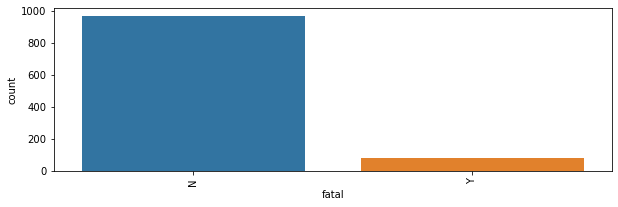

In [53]:
histogram('fatal', df)

Análise do tipo de atividade

In [54]:
# Total de ataques por modalidade

df['type'].value_counts()

Unprovoked      899
Provoked         92
Boating          47
Unknown          13
Sea Disaster      3
Name: type, dtype: int64

C:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


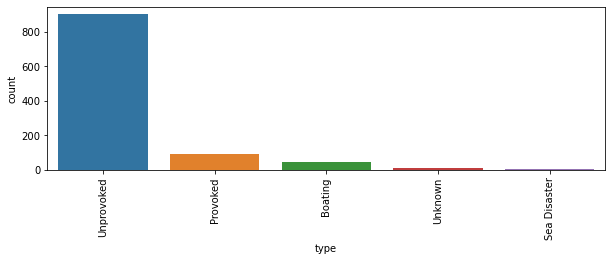

In [55]:
histogram('type', df)

In [56]:
# Tipos de modalidade com fatalidade

y.groupby(['type'])[['fatal']].count()

,fatal
type,
Provoked,2
Sea Disaster,1
Unknown,1
Unprovoked,81


C:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


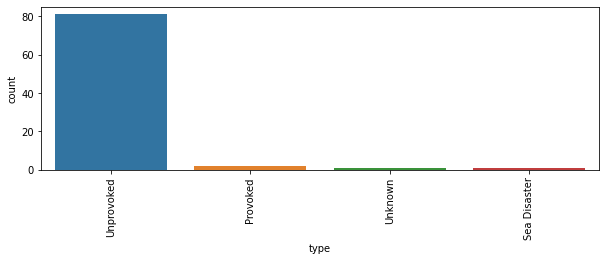

In [57]:
histogram('type', y)

Análise da localidade

In [58]:
# Os 8 lugares com mais ataques de tubarões nos últimos anos

df2 = df["country"].value_counts().sort_values(ascending=False)
df2[:8]

USA             486
AUSTRALIA       226
SOUTH AFRICA     63
BAHAMAS          35
REUNION          23
NEW ZEALAND      18
BRAZIL           18
MEXICO           14
Name: country, dtype: int64

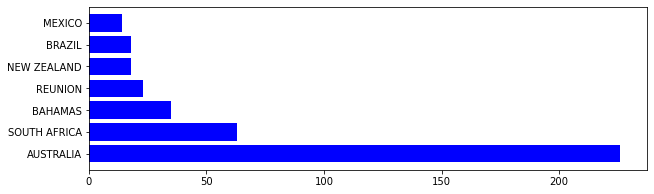

In [59]:
plt.figure(figsize=(10,3))
plt.grid(False)
plt.barh(df2[1:8].index,df2[1:8].values, color="blue")
plt.show()

In [60]:
# Acidentes fatais por localidade

y.groupby(['country'])[['fatal']].count().sort_values(by='fatal')

,fatal
country,
ARUBA,1
MOZAMBIQUE,1
MAURITIUS,1
JAMAICA,1
Fiji,1
FIJI,1
GUAM,1
DIEGO GARCIA,1
CUBA,1


In [61]:
# Os lugares com menos ataques de tubarões nos últimos 10 anos

df['country'].value_counts().tail()

Fiji        1
CHINA       1
MALDIVES    1
ENGLAND     1
SOMALIA     1
Name: country, dtype: int64

Analise sa relação do genero com os ataques

In [62]:
# Total de acidentes por gênero

df['sex'].value_counts()

M    863
F    191
Name: sex, dtype: int64

C:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


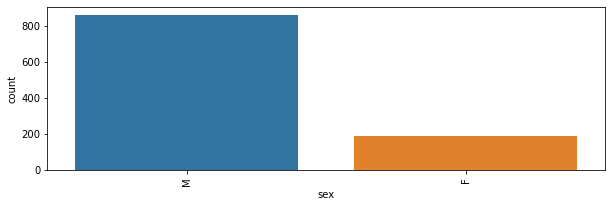

In [63]:
histogram('sex', df)

In [64]:
# Aciidentes fatais por gênero

y.groupby(['sex'])[['fatal']].count().sort_values(by='fatal')

,fatal
sex,
F,13
M,72


C:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


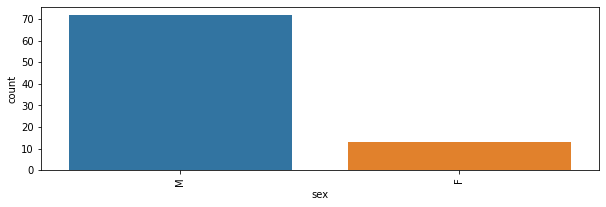

In [65]:
histogram('sex', y)

# Resultado baseado nas análises

Com as analises podemos perceber, que nos últimos 10 anos tivemos por volta de 1.054 ataques de tubarões de diversas espécies pelo mundo.

Mesmo sendo um número alto de ataques, podemos perceber que somente 85, equivalente a 8,06% deles foram fatais. Essa discrepancia se dá, tendo em vista que a carne humana não esta na lista de refeições preferidas dos tubarões, e esses ataques acontecem na maior parte das vezes, por curiosidade do animal mesmo.

Existem alguns estudos que acreditam até que a cor da roupa ultizada pelos banhistas ou as pranchas dos própiros surfistas possam provocar algum dos ataques, mas nada até o momento comprovado.

No meu estudo também não consegui perceber nenhum parâmetro de ataque de acordo com a atividade exercida na água.

Nos últimos 10 anos em que foquei meu estudo pude identificar também que a maior concentração de ataques ocorreram nos EUA e Australia

Na última parte do estudo fiz uma análise pra saber se o gênero das vítimas e pude contatar que os homems são a grande maioria das vítimas total quanto fatais.

No final desse estudo entendemos que os piores liugares para se abrir um Resort baseados nas iformações que temos seria os EUA e Autralia e que os melhores lugares para se pensar fossem Maldivas e Inglaterra.